In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv( '/Users/anshumantewary/Downloads/IPBA/Python/ML Models - Machine Learning Techniquies/T2. Random Forest and Gradient Boosted Machines - Snippets/Data/HR_comma_sep.csv'   )

In [3]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
#Lets look at the categorical variables

df1['sales'].unique()  #Looks like the column is renamed wrongly

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
df1.rename(columns = {'sales':'dept'}, inplace = True)

#df1.head()

In [12]:
df1['salary'].unique().tolist()

['low', 'medium', 'high']

In [14]:
X = df1.drop('left', axis = 1)

y = df1['left']

In [16]:
#X.head()

In [71]:
#Lets now the categorical features

X = pd.get_dummies(X) #One hot encoding
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 200)

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn. tree import DecisionTreeClassifier

In [27]:
clf = BaggingClassifier(oob_score = True, n_jobs = -1, n_estimators = 20, random_state = 200, 
                       base_estimator = DecisionTreeClassifier()   )

clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=200)

In [30]:
clf.oob_score_

0.9849154096174682

In [31]:
clf.score(x_test, y_test)

0.9896666666666667

In [118]:
#Lets now chnage the number of estimators or the number of trees we want on our bagging classifier

for w in range(10, 300, 20):
    clf = BaggingClassifier( oob_score = True, n_jobs = -1, n_estimators = w, random_state = 200, 
                       base_estimator = DecisionTreeClassifier()    )
    clf.fit(x_train, y_train)
    oob = clf.oob_score_ 
    print ('estimators =' + str(w))
    print ('oob =' + str(oob))
    print("*******************")
    

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


estimators =10
oob =0.9808317359779982
*******************
estimators =30
oob =0.9864155346278857
*******************
estimators =50
oob =0.9876656388032335
*******************
estimators =70
oob =0.9879989999166597
*******************
estimators =90
oob =0.9884990415867989
*******************
estimators =110
oob =0.9885823818651555
*******************
estimators =130
oob =0.9883323610300858
*******************
estimators =150
oob =0.9887490624218684
*******************
estimators =170
oob =0.9887490624218684
*******************
estimators =190
oob =0.9889157429785815
*******************
estimators =210
oob =0.9887490624218684
*******************
estimators =230
oob =0.9885823818651555
*******************
estimators =250
oob =0.988665722143512
*******************
estimators =270
oob =0.988832402700225
*******************
estimators =290
oob =0.9889157429785815
*******************


In [119]:
#For estimators, 150 seems to be appropriate.
#now...

In [120]:
clf = BaggingClassifier(oob_score=True, n_estimators= 10, n_jobs = -1, random_state = 200, base_estimator = DecisionTreeClassifier() )

In [121]:
clf.fit(x_train, y_train)

clf.oob_score_

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


0.9808317359779982

In [122]:
#clf.estimators_

In [123]:
clf.estimators_[0].feature_importances_

array([4.77625380e-01, 1.53267218e-01, 1.04945950e-01, 8.90732121e-02,
       1.53664718e-01, 4.84414312e-04, 3.27826513e-04, 1.65702826e-03,
       1.19518742e-03, 1.71166696e-03, 8.44145724e-04, 1.03360719e-03,
       8.01196523e-04, 0.00000000e+00, 2.05503381e-03, 3.65934441e-03,
       3.12720583e-03, 3.08928087e-04, 2.25826508e-03, 1.95967209e-03])

In [124]:
#We can extract feature importance from each tree and then take a mean for all trees

imp = []

for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp = np.mean(imp, axis = 0)

imp

array([4.94348958e-01, 1.46960026e-01, 1.05924384e-01, 9.05877133e-02,
       1.38153584e-01, 1.13190423e-03, 1.71744926e-04, 1.46782608e-03,
       6.94939740e-04, 1.06461122e-03, 8.44623741e-04, 8.52130775e-04,
       6.58492769e-04, 3.62047584e-04, 2.90294255e-03, 2.54129196e-03,
       3.61617436e-03, 2.17038197e-03, 3.02712837e-03, 2.51909429e-03])

In [125]:
feature_importance = pd.Series(imp, index = X.columns.tolist())

In [126]:
feature_importance.sort_values(ascending = False)

satisfaction_level       0.494349
last_evaluation          0.146960
time_spend_company       0.138154
number_project           0.105924
average_montly_hours     0.090588
dept_technical           0.003616
salary_low               0.003027
dept_sales               0.002903
dept_support             0.002541
salary_medium            0.002519
salary_high              0.002170
dept_IT                  0.001468
Work_accident            0.001132
dept_accounting          0.001065
dept_management          0.000852
dept_hr                  0.000845
dept_RandD               0.000695
dept_marketing           0.000658
dept_product_mng         0.000362
promotion_last_5years    0.000172
dtype: float64

<AxesSubplot:>

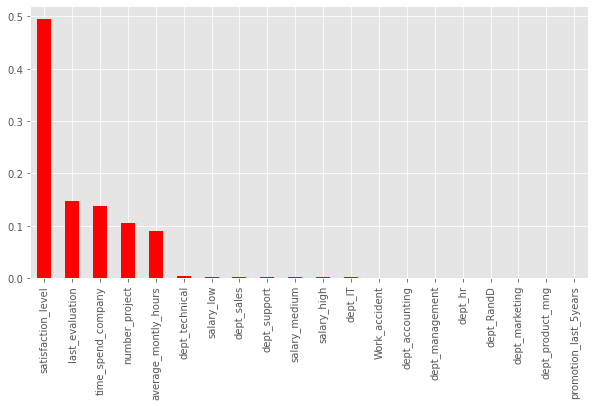

In [127]:
#Plotting the feature importance in a bar chart
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
feature_importance.sort_values(ascending = False).plot(kind = 'bar', color = 'red' )

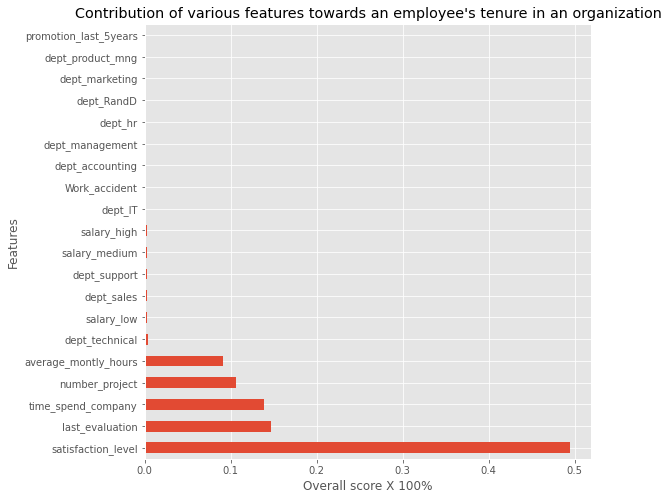

In [128]:
plt.figure(figsize = (8,8))
feature_importance.sort_values(ascending = False).plot(kind = 'barh')
plt.title("Contribution of various features towards an employee's tenure in an organization")
plt.xlabel("Overall score X 100%")
plt.ylabel("Features")
plt.show()


In [129]:
#Now, let us classify the same model using Random Forest classifier ̑

from sklearn.ensemble import RandomForestClassifier

In [130]:
clf = RandomForestClassifier(n_estimators= 80, oob_score= True, n_jobs = -1, random_state = 200)

In [131]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=200)

In [132]:
clf.oob_score_

0.990082506875573

In [133]:
#Lets run a grid search using a simple for loop
for w in range(10, 300, 20):
    clf = RandomForestClassifier( oob_score = True, n_jobs = -1, n_estimators = w, random_state = 200
                       )
    clf.fit(x_train, y_train)
    oob = clf.oob_score_ 
    print ('estimators =' + str(w))
    print ('oob =' + str(oob))
    print("*******************")

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


estimators =10
oob =0.9830819234936244
*******************
estimators =30
oob =0.9882490207517293
*******************
estimators =50
oob =0.9894991249270773
*******************
estimators =70
oob =0.9899991665972164
*******************
estimators =90
oob =0.9903325277106425
*******************
estimators =110
oob =0.990415867988999
*******************
estimators =130
oob =0.9904992082673556
*******************
estimators =150
oob =0.9905825485457121
*******************
estimators =170
oob =0.9904992082673556
*******************
estimators =190
oob =0.9907492291024252
*******************
estimators =210
oob =0.9904992082673556
*******************
estimators =230
oob =0.9903325277106425
*******************
estimators =250
oob =0.9904992082673556
*******************
estimators =270
oob =0.990415867988999
*******************
estimators =290
oob =0.9904992082673556
*******************


In [134]:
#190 estimators

clf = RandomForestClassifier(n_estimators= 190, oob_score= True, n_jobs = -1, random_state = 200)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=190, n_jobs=-1, oob_score=True,
                       random_state=200)

In [135]:
#for random forest, we can directly extract the key contributors

clf.feature_importances_

array([0.31319778, 0.12544776, 0.17666488, 0.15325654, 0.18334196,
       0.01013575, 0.00174216, 0.00180809, 0.00159403, 0.00150496,
       0.00155865, 0.00128232, 0.00140199, 0.00125013, 0.00373889,
       0.00297062, 0.00386671, 0.00521193, 0.00646543, 0.00355942])

In [139]:
features = pd.Series(clf.feature_importances_, index = X.columns)
features.sort_values(ascending = False)

satisfaction_level       0.313198
time_spend_company       0.183342
number_project           0.176665
average_montly_hours     0.153257
last_evaluation          0.125448
Work_accident            0.010136
salary_low               0.006465
salary_high              0.005212
dept_technical           0.003867
dept_sales               0.003739
salary_medium            0.003559
dept_support             0.002971
dept_IT                  0.001808
promotion_last_5years    0.001742
dept_RandD               0.001594
dept_hr                  0.001559
dept_accounting          0.001505
dept_marketing           0.001402
dept_management          0.001282
dept_product_mng         0.001250
dtype: float64

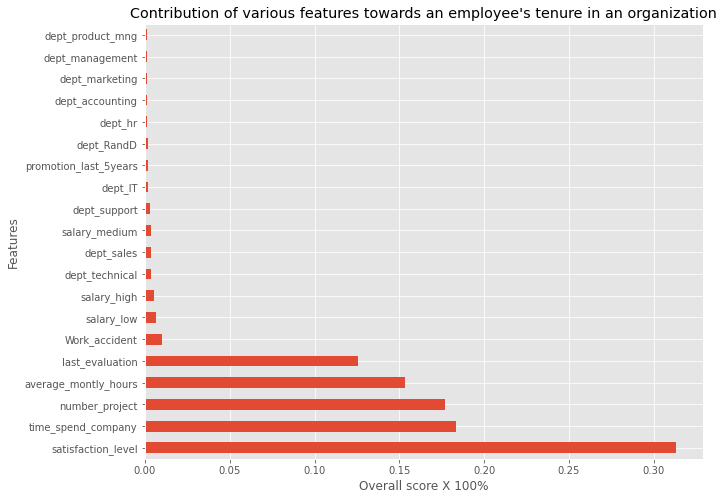

In [145]:
plt.figure(figsize = (10,8))
features.sort_values(ascending = False).plot(kind = 'barh')
plt.title("Contribution of various features towards an employee's tenure in an organization")
plt.xlabel("Overall score X 100%")
plt.ylabel("Features")
plt.show()

In [146]:
#Now, we want to create a boosted tree ensemble in python

## Gradient Boost

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=80, random_state=400)
clf.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [150]:
clf.score(x_test, y_test)

0.974

In [151]:
#Lets tune the hyperparameters using GridSearchCV, since there are no out of bag (OOB) errors and no bootstrapping

from sklearn.model_selection import GridSearchCV

In [157]:
mod = GridSearchCV(clf, param_grid={ 'n_estimators': list(range(60,220,20))     }, cv= 5)
mod.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=400),
             param_grid={'n_estimators': [60, 80, 100, 120, 140, 160, 180,
                                          200]})

In [159]:
mod.best_estimator_

GradientBoostingClassifier(n_estimators=140, random_state=400)

In [161]:
#So the best estimator is 140

clf = clf = GradientBoostingClassifier(n_estimators=140, random_state=400)
clf.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=140, random_state=400)

In [162]:
clf.score(x_test, y_test)

0.9746666666666667

In [163]:
clf.feature_importances_

array([5.38849736e-01, 9.42453685e-02, 1.13371098e-01, 7.43040184e-02,
       1.75356580e-01, 1.60212959e-03, 1.02067719e-05, 1.23082375e-04,
       1.06325958e-04, 9.84817811e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.57663479e-04, 9.30365548e-05, 6.61448826e-05,
       2.85598664e-04, 2.61493737e-04, 1.15116563e-03, 6.50339107e-06])

In [169]:
feature_boost = pd.Series(clf.feature_importances_, index = X.columns)
feature_boost.sort_values(ascending = False)

satisfaction_level       0.538850
time_spend_company       0.175357
number_project           0.113371
last_evaluation          0.094245
average_montly_hours     0.074304
Work_accident            0.001602
salary_low               0.001151
dept_technical           0.000286
salary_high              0.000261
dept_product_mng         0.000158
dept_IT                  0.000123
dept_RandD               0.000106
dept_sales               0.000093
dept_support             0.000066
promotion_last_5years    0.000010
dept_accounting          0.000010
salary_medium            0.000007
dept_marketing           0.000000
dept_management          0.000000
dept_hr                  0.000000
dtype: float64

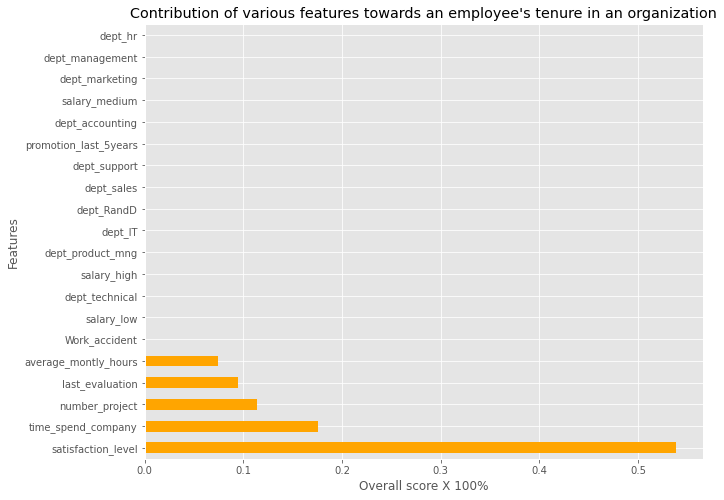

In [175]:
plt.figure(figsize = (10,8))
feature_boost.sort_values(ascending = False).plot(kind = 'barh', color = "Orange")
plt.title("Contribution of various features towards an employee's tenure in an organization")
plt.xlabel("Overall score X 100%")
plt.ylabel("Features")
plt.show()

In [194]:
#Lets create a partial dependence plot to understand the direction of this predictor variable

TypeError: cannot unpack non-iterable PartialDependenceDisplay object

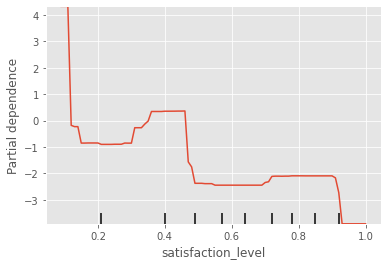

In [196]:
from sklearn.inspection import plot_partial_dependence
fig, axs = plot_partial_dependence(clf, X, [0], feature_names= X.columns.tolist())
#Less people will go out of my org as their satisfaction level increases

TypeError: cannot unpack non-iterable PartialDependenceDisplay object

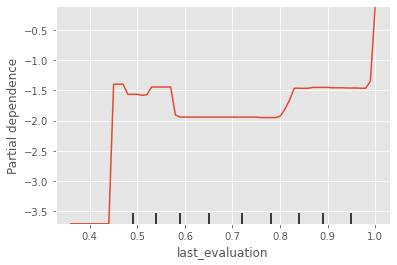

In [197]:
fig, axs = plot_partial_dependence(clf, X, [1], feature_names= X.columns.tolist())

#More people will move out of my org as their last evaluation time increases